<a href="https://colab.research.google.com/github/nayonsoso/hg-mldl/blob/main/Ch01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#k-최근접 이웃 알고리즘(KNN) 실습
k-최근접 이웃(k-Nearest Neighbors, KNN)으로 2개의 종류를 **분류**하는 머신러닝을 훈련해보자.


cf. 2개의 클래스(종류) 중 하나를 고르는 문제를 이진분류라고 함.

1. 도미, 빙어의 데이터 불러오기
2. 산점도로 분포 확인하기 (matplotlib - scatter 사용)
3. 두 데이터 합쳐서 학습 데이터 만들기
4. KNeighborsClassifier 모델 만들기
5. 새로운 데이터 넣어 확인하기

## 1. 데이터 불러오기

In [ ]:
# brema : 도미
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# smelt : 빙어
smelt_length = [ 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [ 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]

## 2. 산점도 확인하기
matplptlib의 scatter 함수를 이용하여 도미의 빙어 데이터를 나타내보았다.

아래와 같이 산점도가 일직선에 가까운 형태로 나타나는 것을 '선형적(linear)이다' 라고 한다.

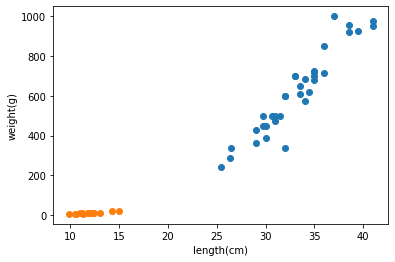

In [ ]:
import matplotlib.pyplot as plt          # matplotlib의 pylot 함수를 plt로 줄여서 사용
plt.scatter(bream_length, bream_weight)  #x 축이 길이, y축이 무게가 되게 설정
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length(cm)')
plt.ylabel('weight(g)')
plt.show()

## 3. 학습 데이터 만들기

train_x 만들기 (책에서는 train_input이라고도 함)


In [ ]:
# 두 배열을 + 한다는 것은 두 배열을 붙여서 새로운 배열을 만든다는 뜻
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [ ]:
# zip() 함수는 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환함
fish_data = [[l, w] for l, w in zip(length, weight)]
# 각 열은 길이와 무게를 의미함
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


train_y 만들기 (책에서는 train_target이라고도 함)

In [ ]:
# 도미 : 1, 빙어 : 0
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 4. 최근접 이웃 모델 만들기

In [ ]:
# k-최근접 이웃 알고리즘을 구현한 라이브러리 임포트
from sklearn.neighbors import KNeighborsClassifier
# 모델 생성
kn = KNeighborsClassifier()
# 학습 데이터와 테스트 데이터 전달
# tenserflow와 마찬가지로 fit함수 이용 ex. model.fit()
kn.fit(fish_data, fish_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 데이터, 라벨 확인
# _fit_X과 _y는 입력(x), 타겟(y)의 값이 잘 전달되었는지를 확인시켜줌
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


## 5. 테스트 하기

In [ ]:
# 정확도 확인
kn.score(fish_data, fish_target)

1.0

In [ ]:
# 새로운 값 예측
kn.predict([[30, 600]])

array([1])

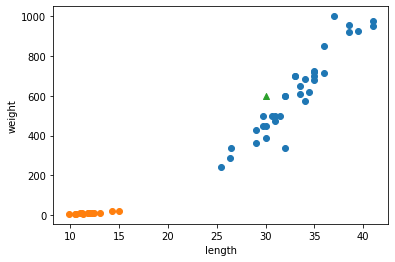

In [ ]:
# 그래프 보기
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^') # 새로운 값을 삼각형으로 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# KNN의 원리
어떤 데이터에 대한 답을 구할 때 주위의 **다른 데이터를 보고 다수를 차지하는 것을 정답으로** 사용한다.

-> 인접한 k개 데이터의 라벨로 분류

n_neighbors 변수로 몇개의 인접 데이터를 참고할지 변경할 수 있다. (디폴트는 5)

ex kn49 = KNeighborsClassifier(n_neighbors=49)

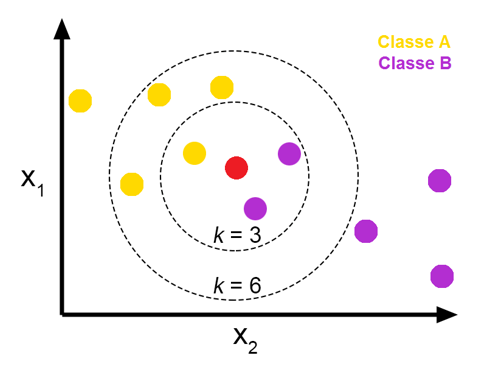

이미지 출처: towardsdatascience

학습보다는 전체 데이터를 메모리에 저장하는 쪽에 가깝다. 따라서 데이터 수가 많아지면 계산이 오래 걸린다는 단점이 있다.

확인 문제

In [ ]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)
for n in range(5, 50):
    # k-최근접 이웃 개수 설정
    kn.n_neighbors = n # 이 라인을 완성해 보세요
    # 점수 계산
    score = kn.score(fish_data ,fish_target) # 이 라인을 완성해 보세요
    # 100% 정확도에 미치지 못하는 이웃 개수 출력
    if score < 1:
        print(n, score)
        break

18 0.9795918367346939
